In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx
/kaggle/input/car-price-prediction/CarPrice_Assignment.csv


# Importing Essential Libraries

In [2]:
# import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly import io

In [3]:
df = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
data_dict = pd.read_excel('/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data_dict.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,DATA DICTONARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1,Car_ID,NaN,NaN,NaN,Unique id of each observation (Interger),NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,2,Symboling,NaN,NaN,NaN,"Its assigned insurance risk rating, A value of...",NaN,NaN


In [6]:
data_dict[['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 11']]

,Unnamed: 6,Unnamed: 7,Unnamed: 11
0,NaN,NaN,NaN
1,DATA DICTONARY,NaN,NaN
2,NaN,NaN,NaN
3,1,Car_ID,Unique id of each observation (Interger)
4,2,Symboling,"Its assigned insurance risk rating, A value of..."
5,3,carCompany,Name of car company (Categorical)
6,4,fueltype,Car fuel type i.e gas or diesel (Categorical)
7,5,aspiration,Aspiration used in a car (Categorical)
8,6,doornumber,Number of doors in a car (Categorical)
9,7,carbody,body of car (Categorical)


In [7]:
df.shape

(205, 26)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
# Droppipng car_Id as it is not a deciding factor in Prediction of cars. (Business Knowledge)
df = df.drop('car_ID', axis = 1)

In [11]:
# Checking Outliers
px.box(data_frame = df['price'], labels = ({'variable':'Checking for Outliers in Price'}),
       color_discrete_sequence= ['seagreen'], hover_name = df['CarName'])

### Outliers consist of cars from only BMW, Porsche, Jaguar & Buick.
### Although we could remove them, we will instead scale all the values to have a same Mean and Standard Deviation.

# Feature Extraction of CarName Column

In [12]:
df['CarName'] = df['CarName'].str.split(' ', expand = True)

In [13]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [15]:
# Renaming Car Company Names' typo errors to their original names.
df['CarName'] = df['CarName'].replace({'maxda':'mazda', 'Nissan':'nissan', 'porcshce':'porsche', 'toyouta': 'toyota', 
                                      'vokswagen':'volkswagen', 'vw':'volkswagen'})

In [16]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
# Data Dictionary says symboling is a categorical variable. So changing it from an 'int' to 'str'.
df['symboling'] = df['symboling'].astype(str)

# Exploratory Data Analysis (EDA)

In [18]:
# Heatmap woth Plotly
fig = px.imshow(df.corr())
fig.update_layout(autosize=False,
    width=700,
    height=700)

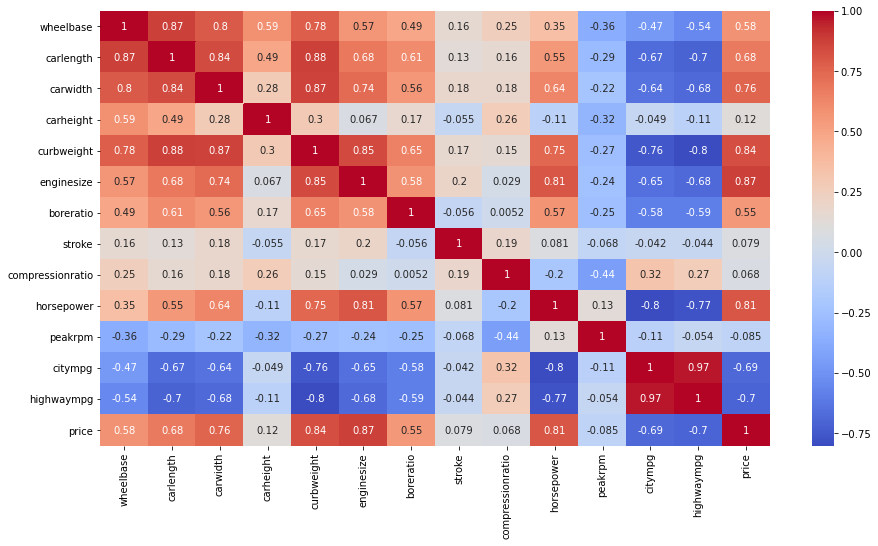

In [19]:
# Heatmap with Seaborn
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

In [20]:
car_count = df['CarName'].value_counts()
px.bar(data_frame = car_count, labels = {'index':'Car Companies', 'value':'Total no of Cars Sold', 'color':'Popularity'}, color = car_count)

In [21]:
px.histogram(data_frame = df, x = 'price', marginal = 'box')

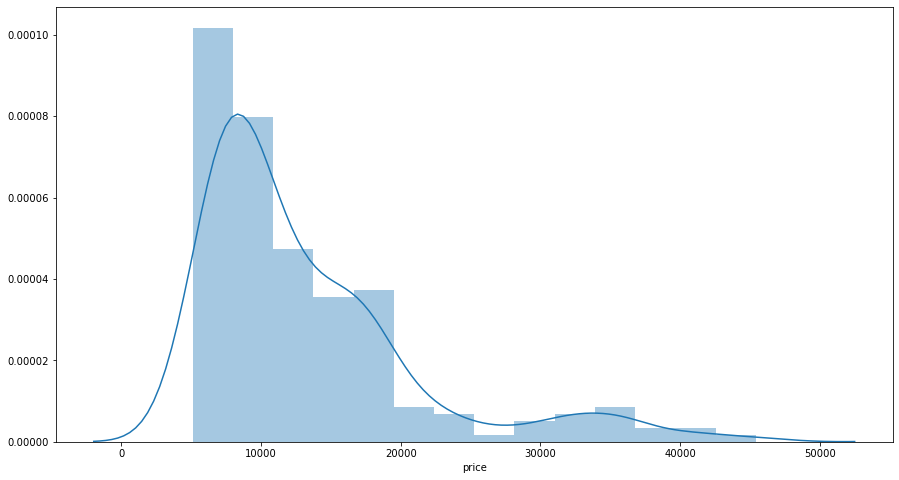

In [22]:
plt.figure(figsize = (15, 8))
sns.distplot(df['price'])

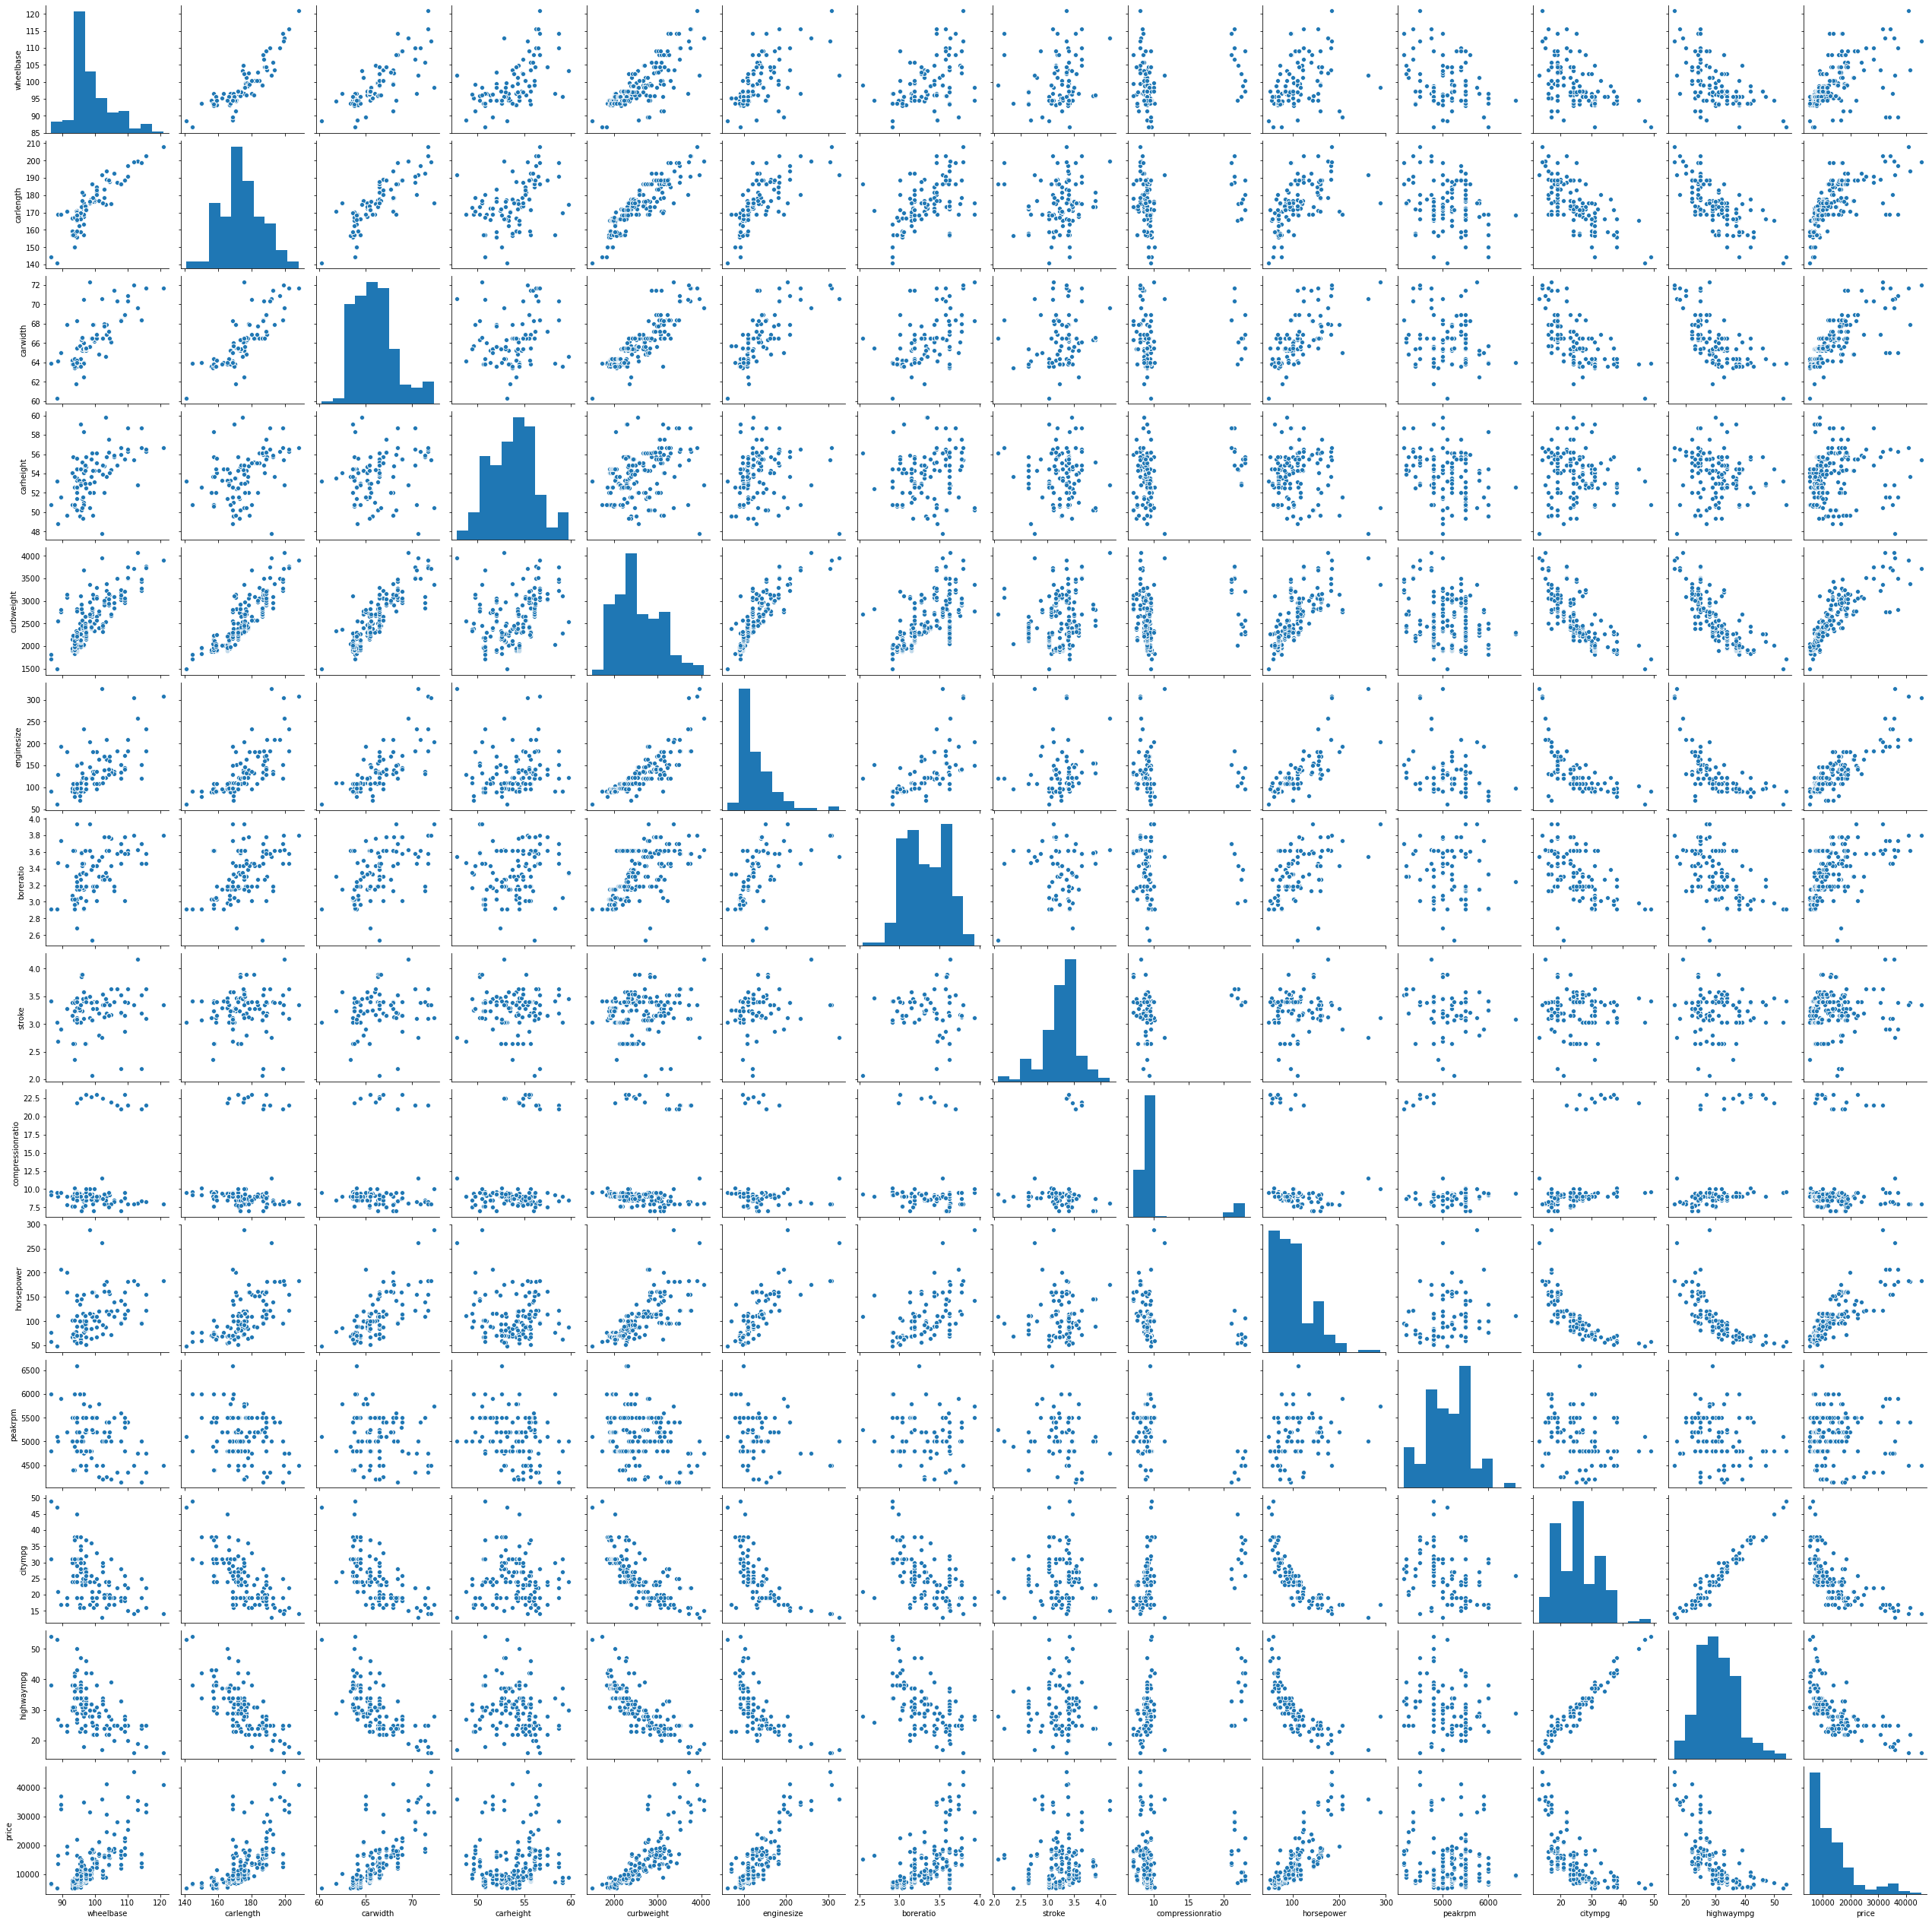

In [23]:
sns.pairplot(df.select_dtypes(exclude = ['object']))

# Observation :

1. carlength, carwidth, curbweight, enginesize & horsepower seems to have a positive correlation with price.
2. citympg & highwaympg both have a negative correlation with price.

In [24]:
df = df[['price','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']]

In [25]:
df.head()

,price,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth
0,13495.0,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
1,16500.0,dohc,gas,std,convertible,four,rwd,88.6,2548,130,3.47,111,21,27,168.8,64.1
2,16500.0,ohcv,gas,std,hatchback,six,rwd,94.5,2823,152,2.68,154,19,26,171.2,65.5
3,13950.0,ohc,gas,std,sedan,four,fwd,99.8,2337,109,3.19,102,24,30,176.6,66.2
4,17450.0,ohc,gas,std,sedan,five,4wd,99.4,2824,136,3.19,115,18,22,176.6,66.4


# Data Preparation

## Encoding Categorical Data

In [26]:
df = pd.get_dummies(df, drop_first = True)

In [27]:
df.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,...,carbody_sedan,carbody_wagon,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,13495.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,1,0,0,0,0,0,1
1,16500.0,88.6,2548,130,3.47,111,21,27,168.8,64.1,...,0,0,0,1,0,0,0,0,0,1
2,16500.0,94.5,2823,152,2.68,154,19,26,171.2,65.5,...,0,0,0,0,1,0,0,0,0,1
3,13950.0,99.8,2337,109,3.19,102,24,30,176.6,66.2,...,1,0,0,1,0,0,0,0,1,0
4,17450.0,99.4,2824,136,3.19,115,18,22,176.6,66.4,...,1,0,1,0,0,0,0,0,0,0


In [28]:
df.iloc[:, 9:21]

,carwidth,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan
0,64.1,0,0,0,0,0,0,1,0,0,0,0
1,64.1,0,0,0,0,0,0,1,0,0,0,0
2,65.5,0,0,0,0,1,0,1,0,0,1,0
3,66.2,0,0,1,0,0,0,1,0,0,0,1
4,66.4,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
200,68.9,0,0,1,0,0,0,1,0,0,0,1
201,68.8,0,0,1,0,0,0,1,1,0,0,1
202,68.9,0,0,0,0,1,0,1,0,0,0,1
203,68.9,0,0,1,0,0,0,0,1,0,0,1


In [29]:
df.shape

(205, 30)

# Splitting into Training & Testing Datasets

In [30]:
#X = df.drop('price', axis = 1)
#y = df['price']

In [31]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 42)

# Standard Scaling all the values except dummy variables (Because it makes no sense to scale binary variables)

In [ ]:
scaled_features = ['price', 'wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
                     'highwaympg', 'carlength', 'carwidth']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train[scaled_features] = sc.fit_transform(df_train[scaled_features])
df_test[scaled_features] = sc.transform(df_test[scaled_features])

In [ ]:
df_train

In [ ]:
X_train = df_train.drop('price', axis = 1)
y_train = df_train['price']

In [ ]:
X_test = df_test.drop('price', axis = 1)
y_test = df_test['price']

In [ ]:
y_train.head()

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

# Model Building

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print ("R2 Score: ", r2_score(y_test, y_pred))
print ("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print ("Mean Square Error: ", mean_squared_error(y_test, y_pred))
print ("Root Mean Square Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))